In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import rebound
import CreateMovie as movie
from matplotlib.patches import Circle
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import interp1d
from RV_stab import *
import scipy.optimize as op
import emcee
import corner

%matplotlib inline
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
mpl.rcParams['legend.numpoints'] = 1
plt.rc('lines', linewidth=1.0)
colors = ['4D4D4D','5DA5DA', 'FAA43A', '60BD68', 'F17CB0','B2912F','B276B2','DECF3F','F15854']
                                #  (blue)
                                # (orange)
                                # (green)
                                # (pink)
                                #  (brown)
                                # (purple)
                                #  (yellow)
                                # (red)
                                # ']
mpl.rcParams['axes.color_cycle'] = colors

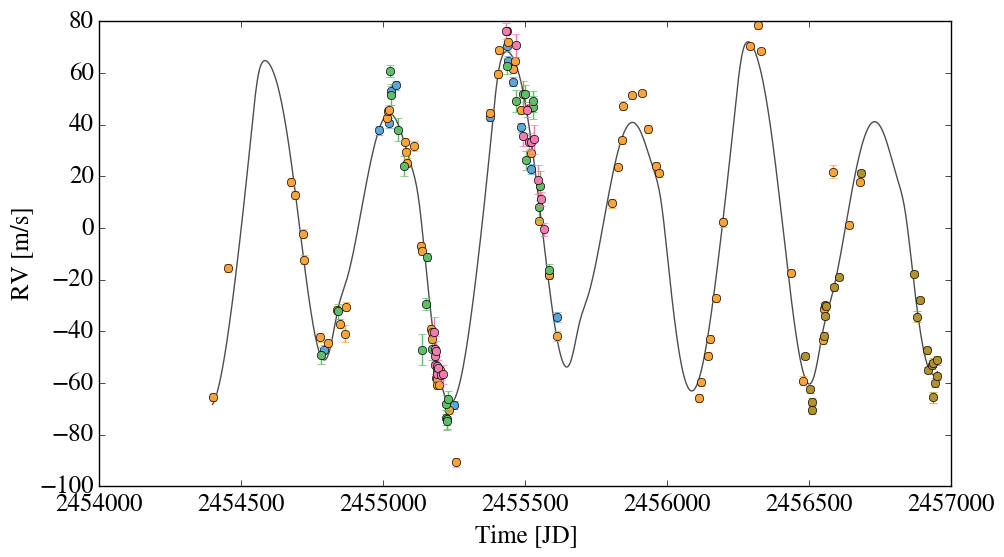

In [51]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
# offsets = result.x
ecc = [0.03,0,0.37]

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc[1], pomega = ang_params[4])

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = (3*HD1502.planets[0].l - 2*lam_3 - phi)%360.
M_3 = (lam_3 - pomega_3)%360.

HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc[2], pomega = pomega_3)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [53]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

26.143388108530619

 0 %
Integration took 288.60613 seconds
Energy Error is 0.000% 
Planet 2 went unstable


0

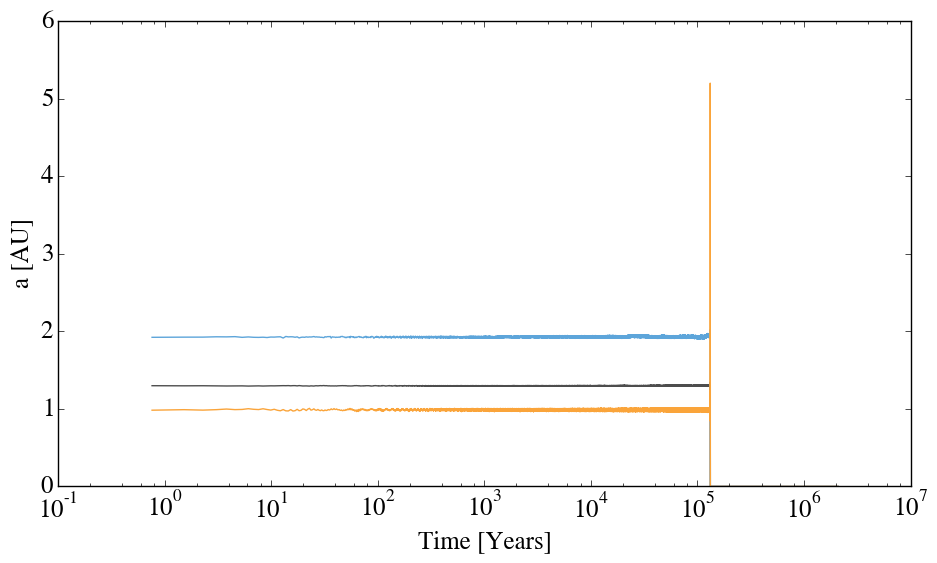

In [55]:
HD1502.orbit_stab(periods=1e6,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='ias15',safe=1
                  ,timing=1,plot=1,energy_err=1)

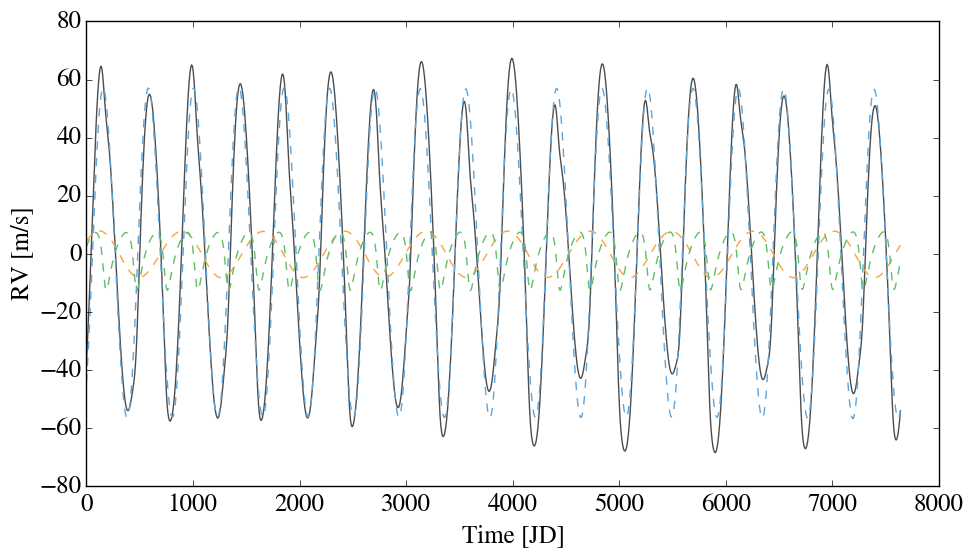

In [3]:
HD1502.plot_planet_RV(epoch=epoch)

# Optimize over mass and $\lambda$

In [4]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
# offsets = result.x
ecc = [0.03,0,0.37]


# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"


In [6]:
def opt_mass_lam(params):
    
    mass_0, mass_1, mass_2, lam_0, lam_1, lam_2 = params
            
    HD1502 = RVSystem(mstar = 1.61)
    epoch = 2454410.0

    HD1502.clear_planets()

    new_params = np.loadtxt('opt_per_mass_from_rmc')
    ecc_tmp = np.loadtxt('ecc_tmp')
    ang_params = np.loadtxt('ang_params')
    offsets = np.loadtxt('offsets_better')
    ecc = [0.03,0,0.37]

    M_0 = lam_0 - ang_params[2]
    M_1 = lam_1 - ang_params[4]
    
    HD1502.add_planet(per = new_params[0], mass = mass_0 , M = M_0, e=ecc[0], pomega = ang_params[2])
    HD1502.add_planet(per = new_params[2], mass = mass_1, M = M_1, e=ecc[1], pomega = ang_params[4])

    phi = ang_params[0]
#     lam_3 = 146.84729
    pomega_2 = (3*HD1502.planets[0].l - 2*lam_2 - phi)
    M_2 = (lam_2 - pomega_2)

    HD1502.add_planet(per = new_params[4], mass = mass_2, M = M_2, e=ecc[2], pomega = pomega_2)

    # HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
    # HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
    # HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


    HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
    HD1502.offsets = offsets
    # HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
    HD1502.path_to_data = "/Applications/Systemic/datafiles/"
    
    return -HD1502.stab_logprob(epoch=epoch,pnts_per_period=20)

In [8]:
params = [new_params[1],new_params[3],new_params[5],ang_params[1]+ang_params[2],ang_params[3]+ang_params[4],146.84729]
opt_mass_lam(params)

1967.6482387004694

In [9]:
t_0 = time.time()
result = op.minimize(opt_mass_lam,params)
print "That took  %.3f seconds" %(time.time()-t_0)

That took  2639.188 seconds


In [10]:
result.x

array([   2.93637381,    0.49576341,    0.39400298,  201.48709625,
        194.11145684,  146.9146596 ])

In [12]:
np.savetxt('lambas_mass_opt',result.x)

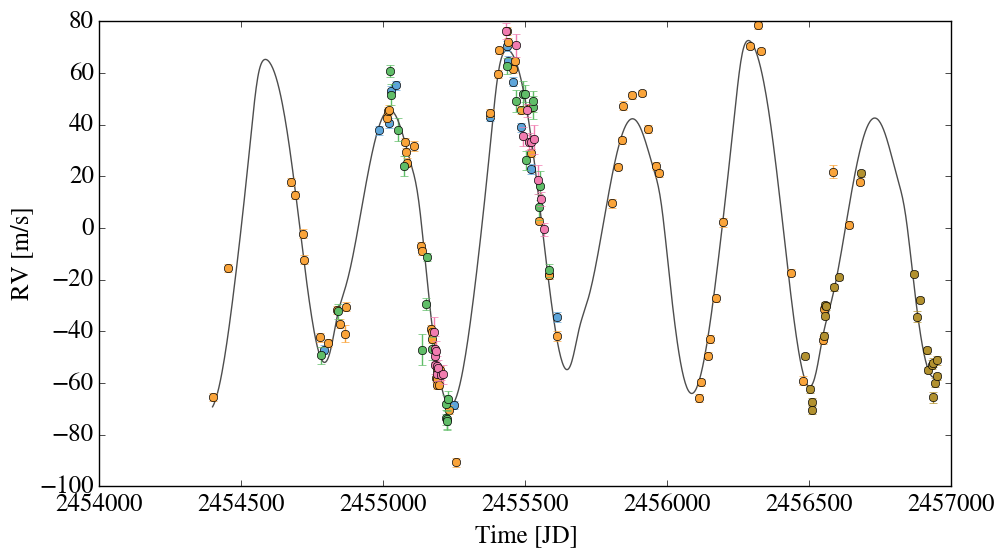

In [14]:
params = result.x

mass_0, mass_1, mass_2, lam_0, lam_1, lam_2 = params

HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
ecc = [0.03,0,0.37]

M_0 = lam_0 - ang_params[2]
M_1 = lam_1 - ang_params[4]

HD1502.add_planet(per = new_params[0], mass = mass_0 , M = M_0, e=ecc[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = mass_1, M = M_1, e=ecc[1], pomega = ang_params[4])

phi = ang_params[0]
#     lam_3 = 146.84729
pomega_2 = (3*HD1502.planets[0].l - 2*lam_2 - phi)
M_2 = (lam_2 - pomega_2)

HD1502.add_planet(per = new_params[4], mass = mass_2, M = M_2, e=ecc[2], pomega = pomega_2)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [16]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

25.743572409252394

# Try with different ICs

In [17]:
params = [new_params[1],new_params[3],new_params[5],ang_params[1]+ang_params[2],ang_params[3]+ang_params[4]+180,146.84729]
opt_mass_lam(params)

5982.6544764835799

In [23]:
bounds = [(0.1,None),(0.1,None),(0.1,None),(None,None),(None,None),(None,None)]

t_0 = time.time()
result = op.minimize(opt_mass_lam,params,bounds=bounds)
print "That took  %.3f seconds" %(time.time()-t_0)

That took  893.046 seconds


In [24]:
result.x

array([  2.99990355e+00,   1.00000000e-01,   3.53046058e-01,
         2.01447546e+02,   3.74046565e+02,   1.46672818e+02])

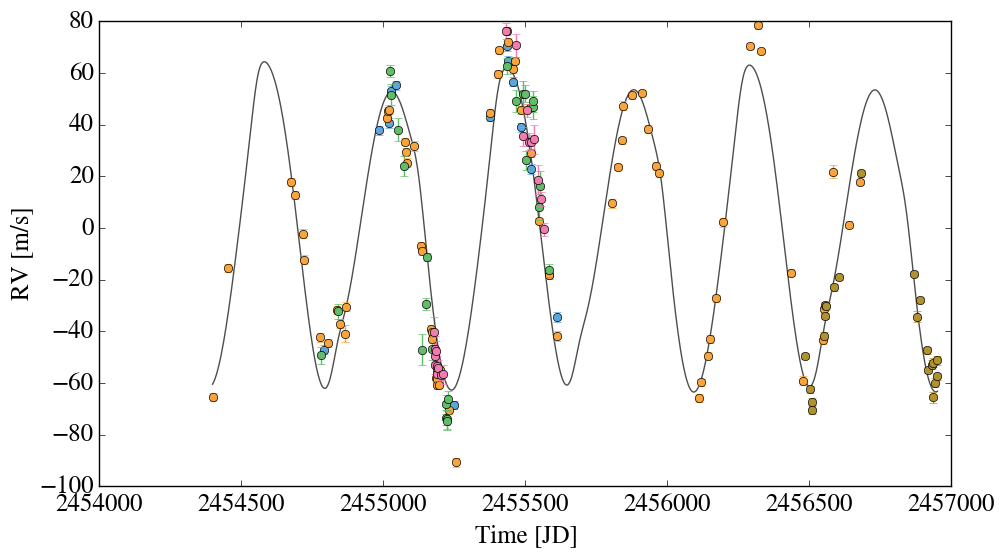

In [25]:
params = result.x

mass_0, mass_1, mass_2, lam_0, lam_1, lam_2 = params

HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
ecc = [0.03,0,0.37]

M_0 = lam_0 - ang_params[2]
M_1 = lam_1 - ang_params[4]

HD1502.add_planet(per = new_params[0], mass = mass_0 , M = M_0, e=ecc[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = mass_1, M = M_1, e=ecc[1], pomega = ang_params[4])

phi = ang_params[0]
#     lam_3 = 146.84729
pomega_2 = (3*HD1502.planets[0].l - 2*lam_2 - phi)
M_2 = (lam_2 - pomega_2)

HD1502.add_planet(per = new_params[4], mass = mass_2, M = M_2, e=ecc[2], pomega = pomega_2)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [27]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

46.154477637024662

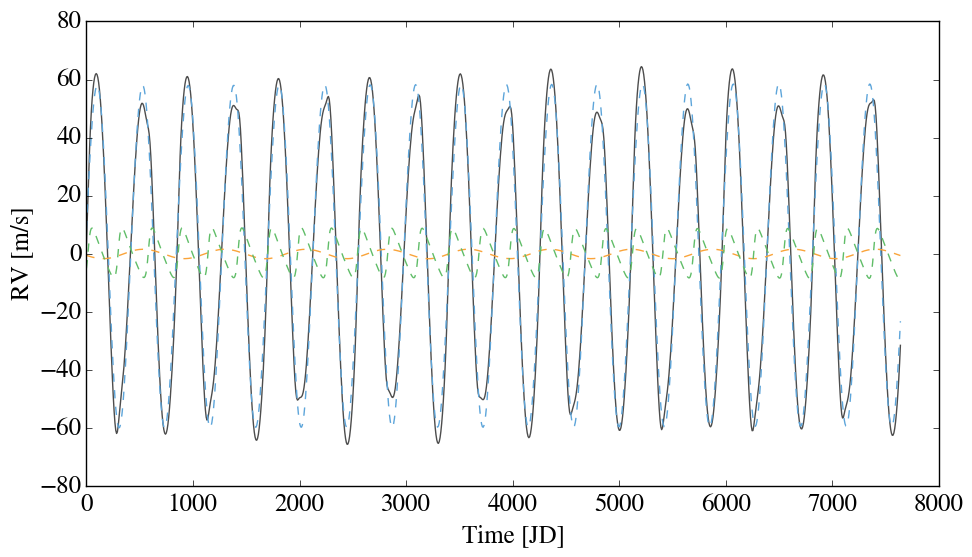

In [28]:
HD1502.plot_planet_RV(epoch=epoch)

# Try with different ICs, Fitting Eccentricity

In [30]:
def opt_mass_lam_ecc(params):
    
    mass_0, mass_1, mass_2, lam_0, lam_1, lam_2, log_e_0, log_e_1, log_e_2 = params
            
    HD1502 = RVSystem(mstar = 1.61)
    epoch = 2454410.0

    HD1502.clear_planets()

    new_params = np.loadtxt('opt_per_mass_from_rmc')
#     ecc_tmp = np.loadtxt('ecc_tmp')
    ang_params = np.loadtxt('ang_params')
    offsets = np.loadtxt('offsets_better')
    ecc = [0.03,0,0.37]

    M_0 = lam_0 - ang_params[2]
    M_1 = lam_1 - ang_params[4]
    
    HD1502.add_planet(per = new_params[0], mass = mass_0 , M = M_0, e=10**(log_e_0), pomega = ang_params[2])
    HD1502.add_planet(per = new_params[2], mass = mass_1, M = M_1, e=10**(log_e_1), pomega = ang_params[4])

    phi = ang_params[0]
#     lam_3 = 146.84729
    pomega_2 = (3*HD1502.planets[0].l - 2*lam_2 - phi)
    M_2 = (lam_2 - pomega_2)

    HD1502.add_planet(per = new_params[4], mass = mass_2, M = M_2, e=10**(log_e_2), pomega = pomega_2)

    # HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
    # HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
    # HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


    HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
    HD1502.offsets = offsets
    # HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
    HD1502.path_to_data = "/Applications/Systemic/datafiles/"
    
    return -HD1502.stab_logprob(epoch=epoch,pnts_per_period=20)

In [38]:
params = [new_params[1],new_params[3],new_params[5],ang_params[1]+ang_params[2],
          ang_params[3]+ang_params[4]+180,146.84729,np.log10(ecc[0]),-4,np.log10(ecc[2])]
opt_mass_lam_ecc(params)

5982.7041806747675

In [39]:
bounds = [(0.1,None),(0.1,None),(0.1,None),(None,None),(None,None),(None,None),(None,-0.2),(None,-0.2),(None,-0.2)]

t_0 = time.time()
result = op.minimize(opt_mass_lam_ecc,params,bounds=bounds)
print "That took  %.3f seconds" %(time.time()-t_0)

RV_stab.py:307: RuntimeWarning: invalid value encountered in absolute
  if (np.abs((a0[k]-planet.a)/a0[k])>1) or planet.a < 0.1:
//anaconda/lib/python2.7/site-packages/rebound/simulation.py:449: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


That took  1415.063 seconds


In [40]:
result.x

array([   2.87887973,    0.49242079,    0.4167619 ,  201.56566752,
        374.1484481 ,  146.84729   ,   -1.52287875,   -4.        ,
         -0.43179828])

In [41]:
params

[2.8788797293639918,
 0.49242079462244215,
 0.41676190180464984,
 201.56566752054749,
 374.14844810261991,
 146.84729,
 -1.5228787452803376,
 -4,
 -0.43179827593300502]

# Parameters from Greymalkin

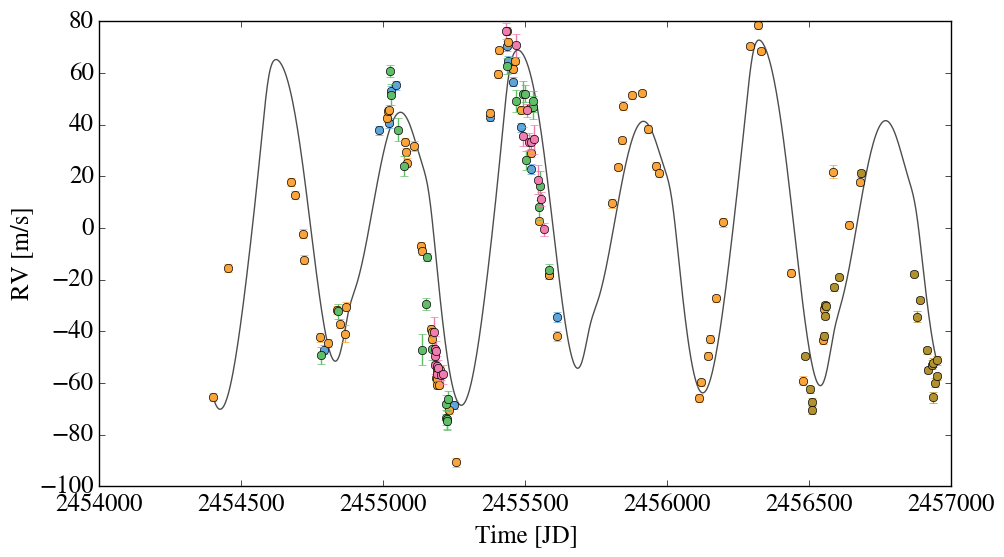

In [4]:
params = [2.91,0.50,0.42,201.95,193.82,147.85,-1.52,-3.99,-0.43]

mass_0, mass_1, mass_2, lam_0, lam_1, lam_2, log_e_0, log_e_1, log_e_2 = params

HD1502 = RVSystem(mstar = 1.61)
epoch = 2454449.23

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
# ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
ecc = [0.03,0,0.37]

M_0 = lam_0 - ang_params[2]
M_1 = lam_1 - ang_params[4]

HD1502.add_planet(per = new_params[0], mass = mass_0 , M = M_0, e=10**(log_e_0), pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = mass_1, M = M_1, e=10**(log_e_1), pomega = ang_params[4])

phi = ang_params[0]
#     lam_3 = 146.84729
pomega_2 = (3*HD1502.planets[0].l - 2*lam_2 - phi)
M_2 = (lam_2 - pomega_2)

HD1502.add_planet(per = new_params[4], mass = mass_2, M = M_2, e=10**(log_e_2), pomega = pomega_2)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [46]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

26.184083479995316

 0 %
 9 %
Integration took 4.29893 seconds
Energy Error is 39.579% 
Planet 1 went unstable


0

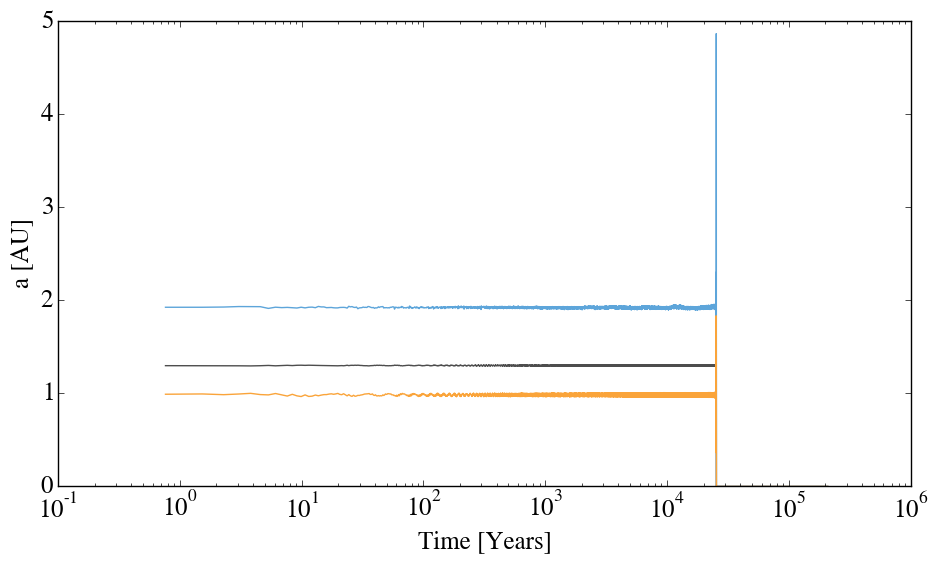

In [48]:
HD1502.orbit_stab(periods=1e5,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

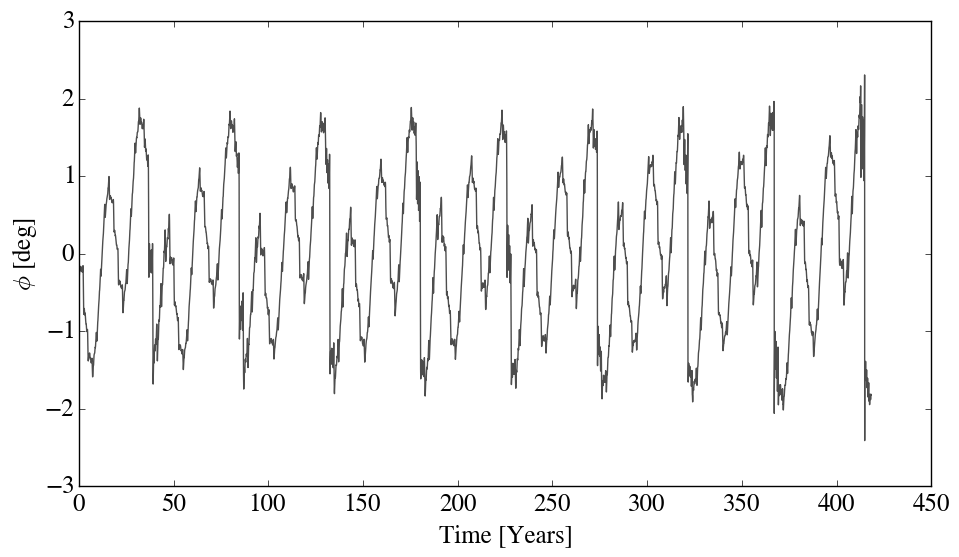

In [49]:
HD1502.plot_phi(pert_ind=0,test_ind=2,p=2,q=1,periods=200)

In [56]:
new_params

array([  4.27572481e+02,   2.87887973e+00,   7.63857742e+02,
         4.92420795e-01,   2.78659908e+02,   4.16761902e-01])

# Check Keplerian vs. Integrated

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


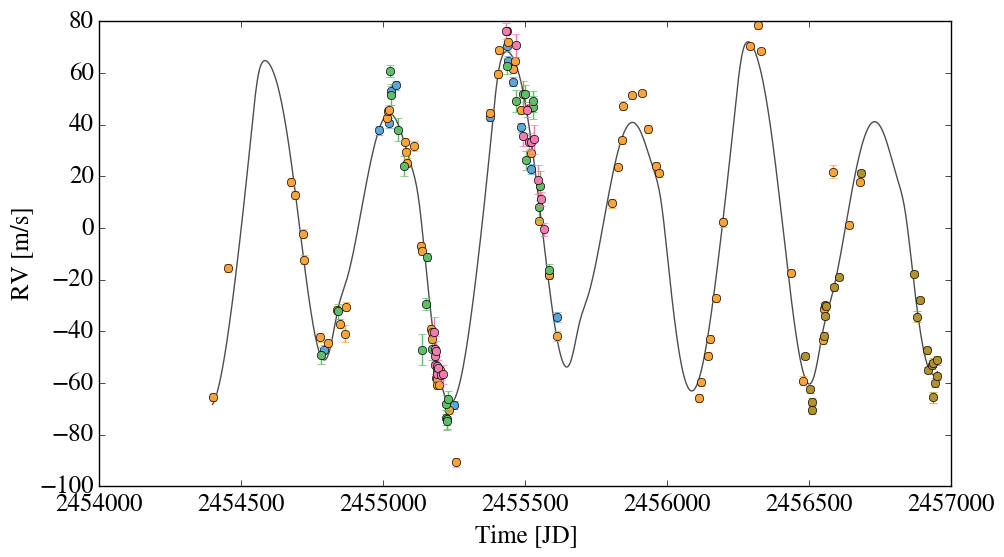

In [2]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

new_params = np.loadtxt('opt_per_mass_from_rmc')
ecc_tmp = np.loadtxt('ecc_tmp')
ang_params = np.loadtxt('ang_params')
offsets = np.loadtxt('offsets_better')
# offsets = result.x
ecc = [0.03,0,0.37]

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = ang_params[1], e=ecc[0], pomega = ang_params[2])
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = ang_params[3], e=ecc[1], pomega = ang_params[4])

phi = ang_params[0]
lam_3 = 146.84729
pomega_3 = (3*HD1502.planets[0].l - 2*lam_3 - phi)%360.
M_3 = (lam_3 - pomega_3)%360.

HD1502.add_planet(per = new_params[4], mass = new_params[5], M = M_3, e=ecc[2], pomega = pomega_3)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = offsets
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

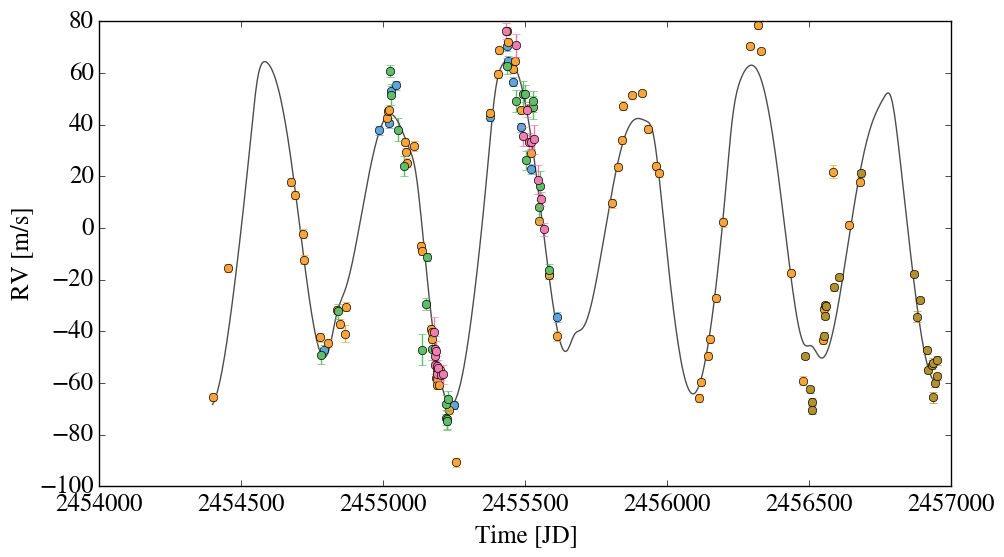

In [3]:
HD1502.plot_RV_kep(epoch=epoch)

In [6]:
print HD1502.calc_chi2(epoch=epoch)/(152-20), HD1502.calc_chi2_kep(epoch=epoch)/(152-20)

26.1433881085 37.1309607101


In [7]:
offsets

array([ 27.75267241,   2.11360448,  16.24621673, -11.3583535 ,  41.65376544])

# Steve's 3 Planet Fit

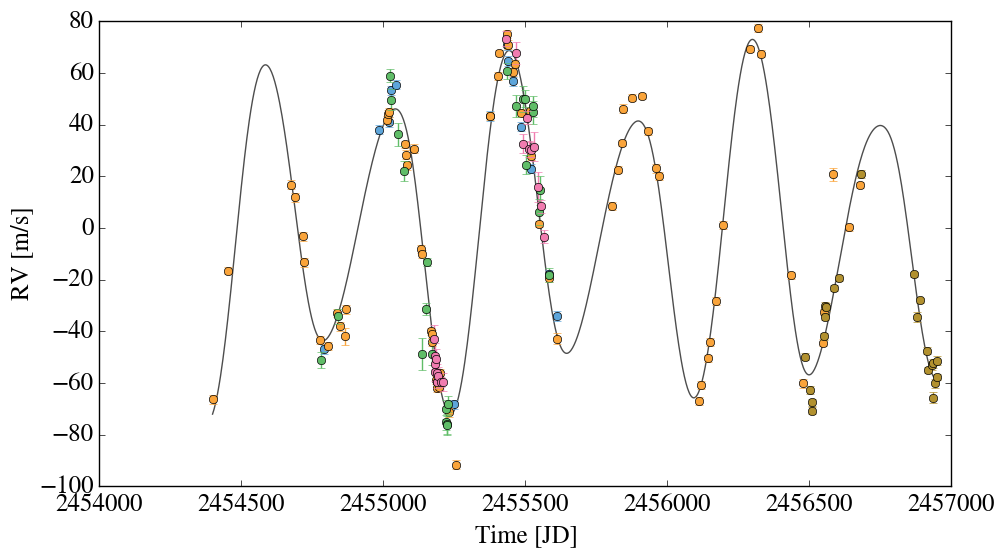

In [70]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454399.8398

HD1502.clear_planets()

HD1502.add_planet(per = 430.59331289, mass = 2.940374 , M = 60.741140, e=0.041800, pomega = 136.847296)
HD1502.add_planet(per = 280.48642221, mass = 0.458721, M = 219.504367, e=0.1, pomega = 316.847280)
HD1502.add_planet(per = 776.09588310, mass = 0.499935, M = 122.807535, e=0.051500, pomega = 75.245985)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

def opt_offsets(offsets):
    HD1502.offsets = offsets
    return -HD1502.log_like(epoch=epoch)

guess = [24.46196,1.48567,15.50687,-10.69490,37.12315]
result = op.minimize(opt_offsets,guess)
HD1502.offsets = result.x

# offsets = np.loadtxt('offsets_better')
# HD1502.offsets = offsets

# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [68]:
offsets-result.x

array([ 0.22094319, -1.04119363, -1.87834715, -2.90472453, -0.2173115 ])

In [71]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

22.306720665414915

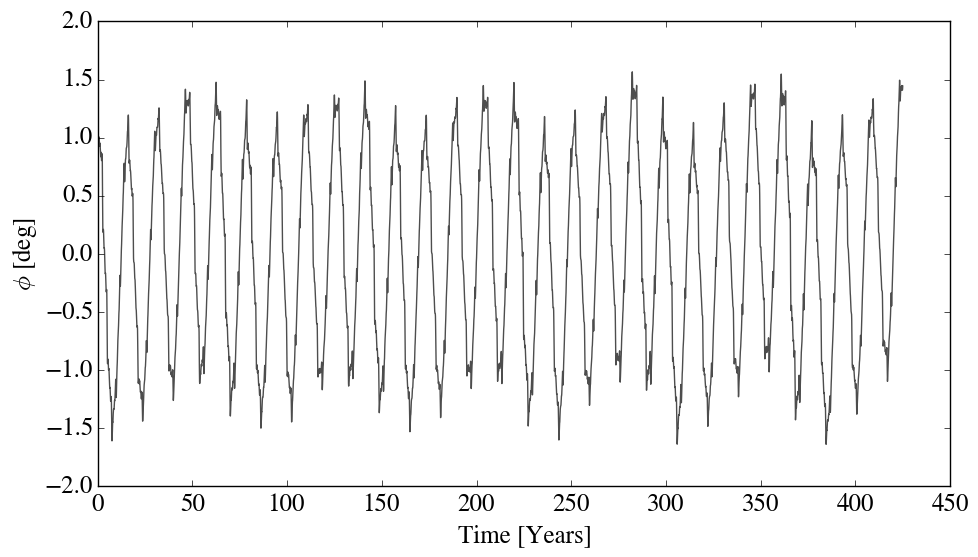

In [53]:
HD1502.plot_phi(pert_ind=0,test_ind=1,p=2,q=1,periods=200)

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
Integration took 34.79845 seconds
Energy Error is 0.001% 
Planet 1 went unstable


0

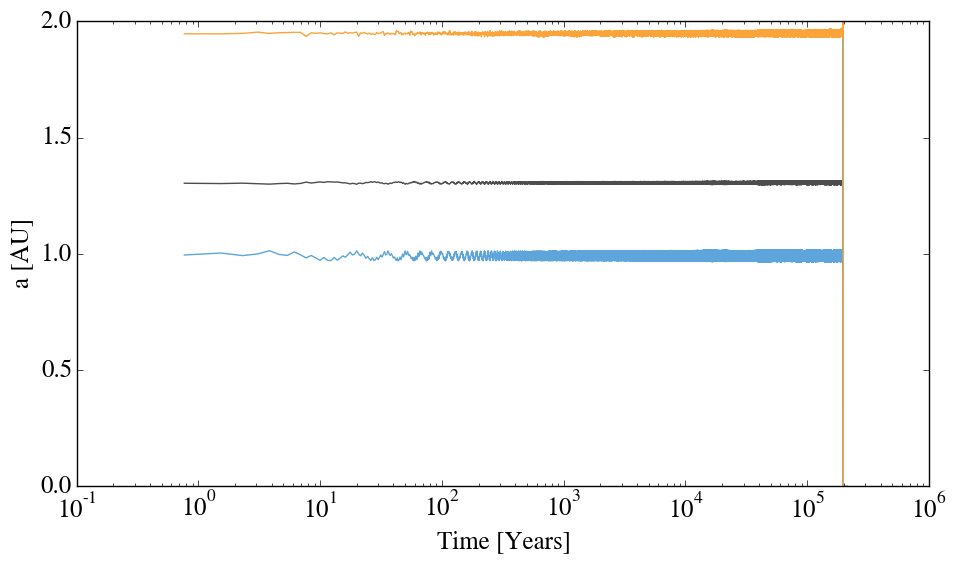

In [10]:
HD1502.orbit_stab(periods=1e5,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [43]:
phi10 = (3*HD1502.planets[0].l-2*HD1502.planets[1].l - HD1502.planets[1].pomega)
l0 = 60.741140 + 136.847296
l1 = 219.504367 + 316.847280
pomega1 = 3*l0 - 2*l1 - phi10

In [49]:
print (1./3.)*(-2.*219.504367 + 3*l0 - phi10)-316.847280

-240.0


In [44]:
3*l0-2*l1 - 316.847280

-796.7852659999999

# Steve 4 Planet Fit

That took  30.061 seconds


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


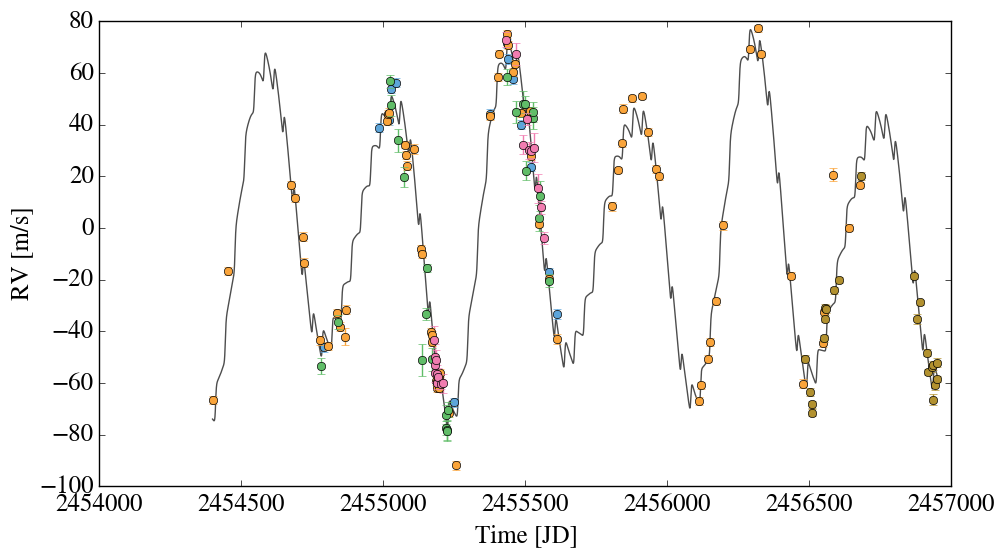

In [2]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454399.8398

HD1502.clear_planets()

HD1502.add_planet(per = 430.59331289, mass = 2.957395 , M = 60.741140, e=0.041800, pomega = 136.847296)
HD1502.add_planet(per = 280.48642221, mass = 0.422739, M = 219.504367, e=0.1, pomega = 316.847280)
HD1502.add_planet(per = 776.09588310, mass = 0.495216, M = 122.807535, e=0.051500, pomega = 75.245985)
HD1502.add_planet(per = 33.91725679, mass = 0.100977, M = 249.084431, e=0.422158, pomega = 260.546413)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

def opt_offsets(offsets):
    HD1502.offsets = offsets
    return -HD1502.log_like(epoch=epoch)

t_0 = time.time()
guess = [24.93338,2.03738,16.41142,-10.98964,38.91007]
result = op.minimize(opt_offsets,guess)
HD1502.offsets = result.x
print "That took  %.3f seconds" %(time.time()-t_0)

# offsets = np.loadtxt('offsets_better')
# HD1502.offsets = offsets

# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch,pnts_per_period=1000)

In [11]:
HD1502.calc_chi2(epoch=epoch)/(152-25)

28.39895373524735

In [79]:
result.x

array([ 26.77568458,   3.28080743,  20.33641296,  -8.02830662,  42.66561848])